In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-dataset/test.csv
/kaggle/input/wine-dataset/train.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/wine-dataset/train.csv')
test_data = pd.read_csv('/kaggle/input/wine-dataset/test.csv')
train_data.shape

(82657, 12)

In [3]:
train_data['country'] = train_data['country'].fillna('unknown')
train_data['region_1'] = train_data['region_1'].fillna('unknown')
train_data['province'] = train_data['province'].fillna('unknown')
train_data['price'] =  train_data['price'].fillna(train_data['price'].mean())
train_data['quality/price']  =np.array(np.log1p(train_data['points']))/np.array(np.log1p(train_data['price']))
train_data['value_for_money'] = train_data['quality/price'].apply(lambda val : 'High' if val > 1.5 else ('Medium' if val > 1.0 else 'Low'))

In [4]:
train_data['all_text_combined0'] = train_data['review_title'] +" " + train_data['review_description']
train_data['all_text_combined3'] = train_data['country'] +" " + train_data['province'] +" " + train_data['region_1'] +" " + train_data['review_title'] +" " + train_data['review_description']

In [5]:
train_data.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety,quality/price,value_for_money,all_text_combined0,all_text_combined3
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay,1.847794,High,Andrew Peace 2007 Peace Family Vineyard Chardo...,Australia Australia Other South Eastern Austra...
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend,1.622963,High,North by Northwest 2014 Red (Columbia Valley (...,US Washington Columbia Valley (WA) North by No...
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo,1.036279,Medium,Renato Ratti 2007 Conca (Barolo) Barolo Conca...,Italy Piedmont Barolo Renato Ratti 2007 Conca ...
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend,1.427953,Medium,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,France Southwest France Bergerac Sec Domaine l...
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec,1.272881,Medium,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,France France Other Vin de Liqueur Château du ...


In [47]:
vocab_size =10000
embedding_dim =64
max_length =100
trunc_type = 'post'
padding_type ='post'
oov_token = '<OOV>'

In [48]:
X_train,X_test = train_test_split(train_data,test_size =0.1,random_state =42)

In [49]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_token)
tokenizer.fit_on_texts(X_train['all_text_combined0'])
word_index = tokenizer.word_index

In [50]:
X_train_sequences = tokenizer.texts_to_sequences(X_train['all_text_combined0'])
print(X_train_sequences[1])
print(len(X_train_sequences))

[95, 6079, 83, 317, 821, 2789, 164, 4887, 9, 6, 183, 14, 2, 3, 5277, 24, 105, 2, 216, 7457, 81, 3, 605, 201, 45, 64, 24, 2, 21, 4, 9, 17, 1053, 1616, 6, 183, 368]
74391


In [51]:
X_train_padded = pad_sequences(X_train_sequences,truncating=trunc_type,padding=padding_type)
print(X_train_padded[1])
print(len(X_train_padded))

[  95 6079   83  317  821 2789  164 4887    9    6  183   14    2    3
 5277   24  105    2  216 7457   81    3  605  201   45   64   24    2
   21    4    9   17 1053 1616    6  183  368    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0]
74391


In [52]:
X_test_sequences = tokenizer.texts_to_sequences(X_test['all_text_combined0'])
print(X_test_sequences[1])

[1441, 1294, 4857, 7584, 53, 713, 7584, 953, 391, 1043, 4, 56, 6, 320, 16, 14, 2, 1324, 4662, 44, 8, 1, 202, 3, 639, 1630, 18, 7, 77, 25, 251, 532, 53, 437, 502, 10, 953, 391, 1043, 792, 266, 60, 70, 2, 190, 40, 11, 34, 639, 15, 3, 23, 6, 4, 170, 5, 116, 180, 201, 417, 473, 1329, 26, 74, 1443]


In [53]:
X_test_padded = pad_sequences(X_test_sequences,truncating=trunc_type,padding=padding_type)
print(X_test_padded[1])

[1441 1294 4857 7584   53  713 7584  953  391 1043    4   56    6  320
   16   14    2 1324 4662   44    8    1  202    3  639 1630   18    7
   77   25  251  532   53  437  502   10  953  391 1043  792  266   60
   70    2  190   40   11   34  639   15    3   23    6    4  170    5
  116  180  201  417  473 1329   26   74 1443    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]


In [54]:
lb = LabelEncoder()
Y_train_padded = np.array([[i] for i in lb.fit_transform(X_train['variety'])])
Y_test_padded = np.array([[i] for i in  lb.fit_transform(X_test['variety'])])


In [55]:
print(Y_train_padded.shape)
print(Y_test_padded.shape)

(74391, 1)
(8266, 1)


In [56]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(28, activation='softmax')
])

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 28)                1820      
Total params: 716,124
Trainable params: 716,124
Non-trainable params: 0
_________________________________________________________________


In [58]:
optim = tf.keras.optimizers.Adam(learning_rate=0.004)

In [59]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

In [60]:
num_epochs = 5
history = model.fit(X_train_padded, Y_train_padded, epochs=num_epochs, validation_data=(X_test_padded, Y_test_padded), verbose=1)

Train on 74391 samples, validate on 8266 samples
Epoch 1/5
74391/74391 [==============================] - 52s 698us/sample - loss: 0.2552 - accuracy: 0.9232 - val_loss: 0.1191 - val_accuracy: 0.9573
Epoch 2/5
74391/74391 [==============================] - 49s 664us/sample - loss: 0.0817 - accuracy: 0.9740 - val_loss: 0.0952 - val_accuracy: 0.9694
Epoch 3/5
74391/74391 [==============================] - 49s 654us/sample - loss: 0.0676 - accuracy: 0.9787 - val_loss: 0.0954 - val_accuracy: 0.9699
Epoch 4/5
74391/74391 [==============================] - 49s 665us/sample - loss: 0.0628 - accuracy: 0.9800 - val_loss: 0.1021 - val_accuracy: 0.9688
Epoch 5/5
74391/74391 [==============================] - 48s 650us/sample - loss: 0.0568 - accuracy: 0.9819 - val_loss: 0.1186 - val_accuracy: 0.9685


In [61]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

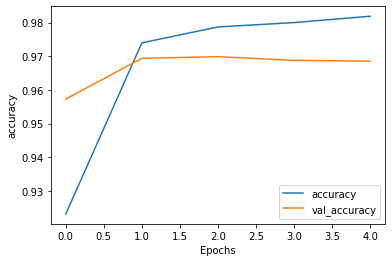

In [62]:
plot_graphs(history, 'accuracy')

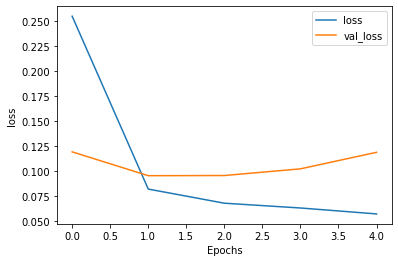

In [63]:
plot_graphs(history, 'loss')

In [64]:
X_train,X_test = train_test_split(train_data,test_size =0.1,random_state =42)

In [65]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_token)
tokenizer.fit_on_texts(X_train['all_text_combined3'])
word_index = tokenizer.word_index

In [66]:
X_train_sequences = tokenizer.texts_to_sequences(X_train['all_text_combined3'])
X_train_padded = pad_sequences(X_train_sequences,truncating=trunc_type,padding=padding_type)
X_test_sequences = tokenizer.texts_to_sequences(X_test['all_text_combined3'])
X_test_padded = pad_sequences(X_test_sequences,truncating=trunc_type,padding=padding_type)

In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(28, activation='softmax')
])

In [83]:
optim = tf.keras.optimizers.Adam(learning_rate=0.004)

In [84]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

In [85]:
num_epochs = 5
history = model.fit(X_train_padded, Y_train_padded, epochs=num_epochs, validation_data=(X_test_padded, Y_test_padded), verbose=1)

Train on 74391 samples, validate on 8266 samples
Epoch 1/5
74391/74391 [==============================] - 52s 697us/sample - loss: 0.0264 - accuracy: 0.9921 - val_loss: 0.1411 - val_accuracy: 0.9704
Epoch 2/5
74391/74391 [==============================] - 49s 655us/sample - loss: 0.0222 - accuracy: 0.9934 - val_loss: 0.1336 - val_accuracy: 0.9711
Epoch 3/5
74391/74391 [==============================] - 50s 666us/sample - loss: 0.0182 - accuracy: 0.9943 - val_loss: 0.1468 - val_accuracy: 0.9716
Epoch 4/5
74391/74391 [==============================] - 49s 665us/sample - loss: 0.0181 - accuracy: 0.9945 - val_loss: 0.1574 - val_accuracy: 0.9727
Epoch 5/5
74391/74391 [==============================] - 50s 668us/sample - loss: 0.0180 - accuracy: 0.9949 - val_loss: 0.1528 - val_accuracy: 0.9694


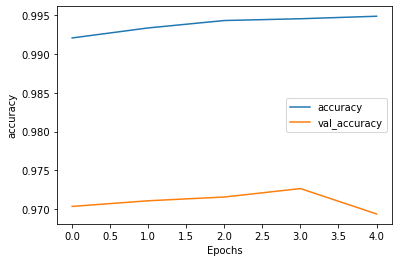

In [86]:
plot_graphs(history, 'accuracy')

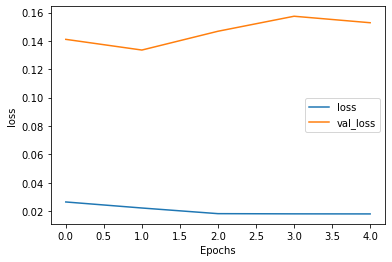

In [87]:
plot_graphs(history, 'loss')